# Complexity Analysis Tool for Caffe Model in Prototxt

In [1]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
import os
caffe.set_device(0)
caffe.set_mode_gpu()

In [2]:
def flops(net, table=True):
    flops_records = []
    result = []
    result.append('Layer Name | Kernel Size | Output Size | FLOPS | FLOPS %')
    result.append('--- | ---: | ---: | ---: | ---:')
    for i, k in enumerate(net.top_names.iterkeys()):
        if net.layers[i].type != 'Convolution':
            continue
        kernel_shape = net.params[k][0].data.shape
        output_shape = net.blobs[k].data.shape
        channel_in = kernel_shape[1]
        channel_out = kernel_shape[0]
        flops = (kernel_shape[-1] ** 2) * (output_shape[-1] ** 2) * channel_in * channel_out
        line = '%s | %s | %s | %s' % (k, kernel_shape, output_shape, "{:,}".format(flops))
        result.append(line)
        flops_records.append(flops)

    total_flops = np.sum(flops_records)
    result.append('- | - | - | - | -')
    result.append('**Summary** | - | - | **%s** | - ' % "{:,}".format(total_flops))
    result.append('(in units) | - | - | **%.1f GFLOPS** | - ' % (float(total_flops)/1024/1024/1024))

    # Calculate FLOPS % for each conv layer
    flops_ratios = []
    for i, flops in enumerate(flops_records):
        percent = float(flops) / total_flops * 100
        flops_ratios.append(percent)
        percent = ' | %.2f %%' % percent
        result[i + 2] += percent

    if table:
        for l in result:
            print l

        plt.figure(figsize=(15, 7))
        plt.bar(range(len(flops_ratios)), flops_ratios)
        plt.title("FLOPS Analysis", size=20)
        plt.xlabel('Layer ID')
        plt.ylabel('FLOPS %')
        plt.grid(True)
        plt.show()
    return total_flops

In [4]:
model = 'deploy.prototxt'
net = caffe.Net(model, caffe.TEST)

Layer Name | Kernel Size | Output Size | FLOPS | FLOPS %
--- | ---: | ---: | ---: | ---:
conv1_1 | (39, 3, 3, 3) | (1, 39, 320, 320) | 107,827,200 | 0.30 %
conv1_2 | (64, 39, 3, 3) | (1, 64, 320, 320) | 2,300,313,600 | 6.37 %
conv2_1 | (128, 64, 3, 3) | (1, 128, 160, 160) | 1,887,436,800 | 5.23 %
conv2_2 | (128, 128, 3, 3) | (1, 128, 160, 160) | 3,774,873,600 | 10.46 %
conv3_1 | (256, 128, 3, 3) | (1, 256, 80, 80) | 1,887,436,800 | 5.23 %
conv3_2 | (256, 256, 3, 3) | (1, 256, 80, 80) | 3,774,873,600 | 10.46 %
conv3_3 | (256, 256, 3, 3) | (1, 256, 80, 80) | 3,774,873,600 | 10.46 %
conv4_1 | (512, 256, 3, 3) | (1, 512, 40, 40) | 1,887,436,800 | 5.23 %
conv4_2 | (512, 512, 3, 3) | (1, 512, 40, 40) | 3,774,873,600 | 10.46 %
conv4_3 | (512, 512, 3, 3) | (1, 512, 40, 40) | 3,774,873,600 | 10.46 %
conv5_1 | (512, 512, 3, 3) | (1, 512, 20, 20) | 943,718,400 | 2.61 %
conv5_2 | (512, 512, 3, 3) | (1, 512, 20, 20) | 943,718,400 | 2.61 %
conv5_3 | (512, 512, 3, 3) | (1, 512, 20, 20) | 943,718,400 

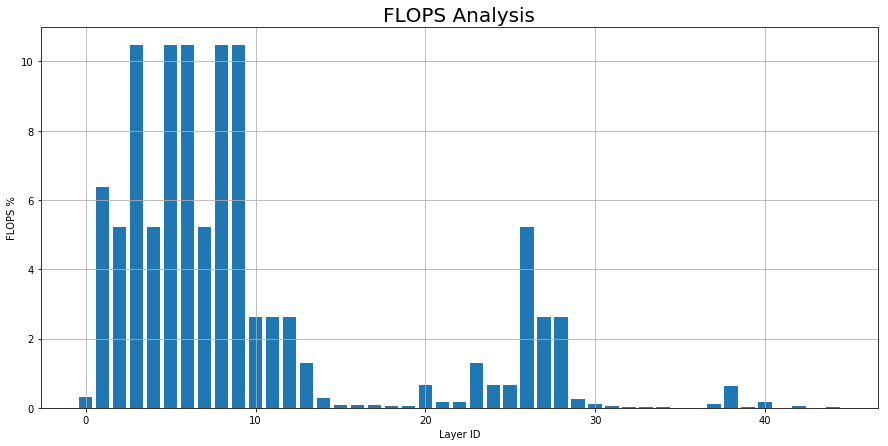

Total FLOPS = 33


In [6]:
result = flops(net)
print "Total FLOPS = %d" % (float(result)/1024**3)